# Data Analysis
2023-March-03, NSYSU, Exp. course 

[lecture homepage](https://github.com/baobabyoo/Lecture_DataAnalysis)

## Importing packages

In [1]:
import os, sys, time

sys.path
sys.path.append('./')

import numpy as np
from scipy.optimize import curve_fit

import matplotlib
matplotlib.use('PDF')
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

## Defining functions

In [2]:
def myline(x, a, b):
    '''
    A function to return y = ax + b
    
    Input:
        x [double] : the x-axis coordinate 
        a [double] : slope of a 1st order polynomial
        b [double] : offset of a 1st order polynomial
        
    Return:
        y [double] : the y-axis value
    '''
    y = a * x + b
    
    return y

def gaussian_1d(x, amp, x0, sigma):
    '''
    Return a Gaussian distribution that is normalized to 1.0
             
    Input:
        x [double]       : offset
        amp [double]     : amplitude
        x0 [double]      : central position of the Gaussian
        sigma [double]   : standard deviation of the Gaussian
            
    Return:
        [double]   : A 1-dim Gaussian function
    '''
    
    A = 1.0 / (sigma * np.sqrt(2.0 * np.pi))
    
    xdiff = x - x0    
    B = -0.5 * (( xdiff/sigma )**2.0)

    return amp * A * np.exp(B)


## 1. Plotting (A look at 1D Gaussian random variable and uniform random variable)

### 1.1 Producing some data to plot

In [3]:
num_x = 300
x = np.arange(num_x)

mu     = 10.0
sigma  = 3.0
y_gaus = np.random.normal(loc=mu, scale=sigma, size=num_x)

low    = -8.0
high   = 2.0
y_unif = np.random.uniform(low=low, high=high, size=num_x)

### 1.2 Plotting data

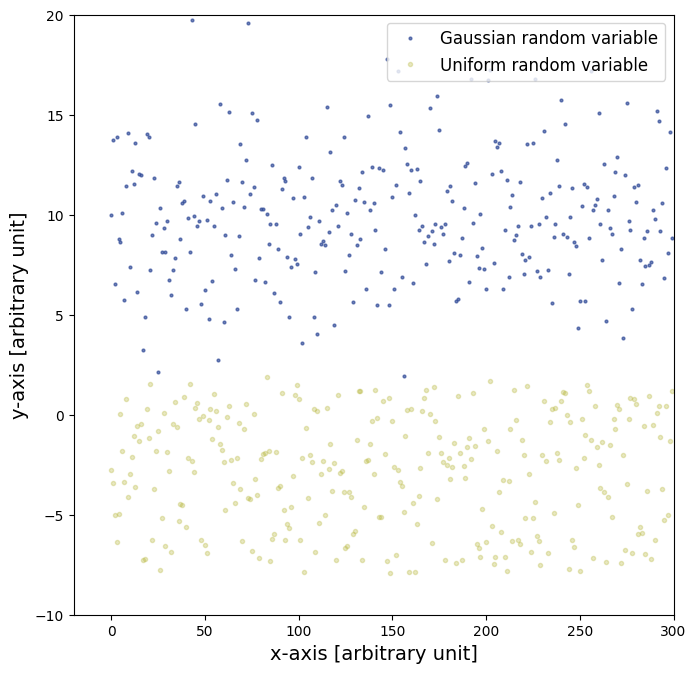

In [4]:
# Initializing Figure ############################################
fig = plt.figure(
                 figsize = (8, 8)
                )
ax = fig.add_axes([0.12, 0.1, 0.75, 0.75])

# Set the x/y axis title and legend
plt.xlabel('x-axis [arbitrary unit]', size = 14.0)
plt.ylabel('y-axis [arbitrary unit]', size = 14.0)

plt.xscale('linear')
plt.yscale('linear')
#plt.xscale('linear')
#plt.yscale('linear')
plt.rc('font', size=14.0)          # controls default text sizes
plt.rc('xtick', labelsize=14.0)    # fontsize of the tick labels
plt.rc('ytick', labelsize=14.0)    # fontsize of the tick labels
##################################################################

plt.plot(
    x,
    y_gaus,
    'o', # symbol shape
    color=(0.2,0.3,0.6, 0.7), # (R, G, B, transparency), ranged between [0, 1]
    markersize=2, 
    label = "Gaussian random variable"
        )

plt.plot(
    x,
    y_unif,
    'o', # symbol shape
    color=(0.7,0.7,0.2, 0.3), # (R, G, B, transparency), ranged between [0, 1]
    markersize=3, 
    label = "Uniform random variable"
        )

# Setting the figure legend 
plt.legend(loc=1, fontsize=12)

# Setting the plot range
plt.xlim( (-20, num_x) )
plt.ylim( (-10, 20) )

# PDF file output
plt.savefig('Gaussian_random_xy.pdf', 
            transparent = True
           )

### 1.3 plotting histogram

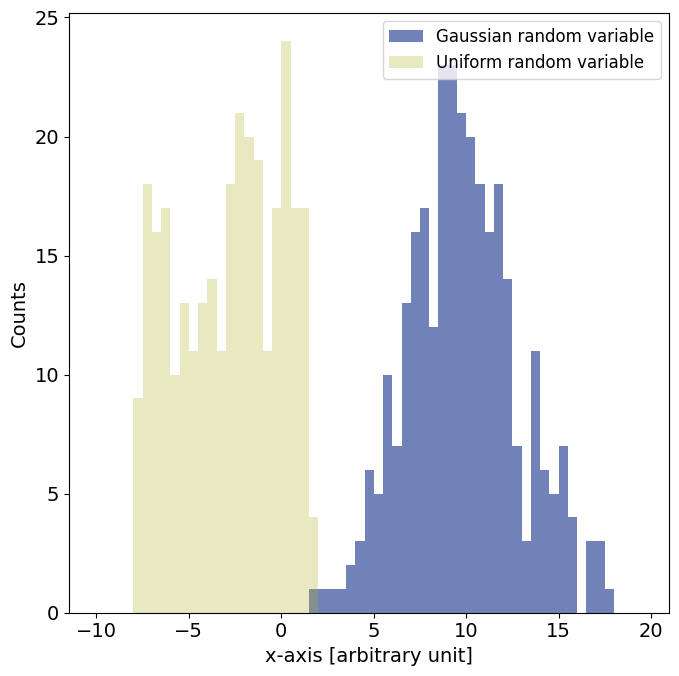

In [5]:
# Initializing Figure ############################################
fig = plt.figure(
                 figsize = (8, 8)
                )
ax = fig.add_axes([0.12, 0.1, 0.75, 0.75])

# Set the x/y axis title and legend
plt.xlabel('x-axis [arbitrary unit]', size = 14.0)
plt.ylabel('Counts', size = 14.0)

plt.xscale('linear')
plt.yscale('linear')
#plt.xscale('linear')
#plt.yscale('linear')
plt.rc('font', size=14.0)          # controls default text sizes
plt.rc('xtick', labelsize=14.0)    # fontsize of the tick labels
plt.rc('ytick', labelsize=14.0)    # fontsize of the tick labels
##################################################################

bins = np.arange(-10, 20, 0.5)


plt.hist(y_gaus, 
         bins=bins, color=(0.2,0.3,0.6, 0.7),
         label = "Gaussian random variable"
        )

plt.hist(y_unif, 
         bins=bins, color=(0.7,0.7,0.2, 0.3),
         label = "Uniform random variable"
        )

# Setting the figure legend 
plt.legend(loc=1, fontsize=12)

# PDF file output
plt.savefig('Gaussian_random_histogram.pdf', 
            transparent = True
           )

## 2. Data I/O

### 2.1 Generating data

In [6]:
num_x = num_x
low   = 0
high  = 100
x = np.random.uniform(low=low, high=high, size=num_x)

a       = 10.0
b       = 100.0
sigma_y = 30.0

y_err = np.random.normal(loc=0, scale=sigma_y, size=num_x)
y     = myline(x, a, b) + y_err
print(y)

[ 539.30860422  565.33601415 1008.42177429  926.59048155  295.829602
  317.70481127  349.12168757  900.85111401  436.34847338  961.71572394
  547.82880035  826.18388264  718.45029801  350.0322329   141.54469257
  810.290083    183.72729547  719.94571365  803.44045419  149.78264425
 1013.75570422  401.72835911  152.52939572  974.80158984  871.48558383
  882.59685262  499.61647797 1072.92237926  387.55510991  753.8878586
  548.64158047  250.73756346  810.23872064  893.35573494  994.61876665
  669.87692572  173.07012715  249.53153177  733.42785341  607.20775065
  757.2505982   292.07451962  494.89771789  409.75787264  606.55261294
  637.06163715  218.88769219  481.7930673   606.06023266  303.35665408
  430.97583052  846.65253083  454.95953655  378.22027547  933.60009175
  655.63938523 1051.24654832  880.65744268  473.88771608  776.64271322
  586.85776516  203.76816071  290.68365663  273.67297836  232.61080014
  219.2042582   467.95819096  217.20739468  399.6583887   600.69733795
  357.433

### 2.2 Standard data output, and data input with numpy.loadtxt

#### 2.2.1 Standard file output

In [7]:
filename = 'data_1dpoly.txt'

# remove the file in case it exist
os.system('rm -rf '+ filename)

# open output file
f = open(filename, "w")

for i in range(0,num_x):
    out_string = str(x[i]) + ' ' + str(y[i]) + ' '  +  str(sigma_y) +'\n' # '\n is a line break'
    f.write(out_string)

# close output file
f.close()

#### 2.2.2 Read space-separated values using numpy.loadtxt method

In [8]:
x, y, y_err = np.loadtxt(filename, 
                  usecols=(0, 1, 2),
                  unpack = True
                 )
print ("##### Loaded x values")
print(x)
print(' ')
print ("##### Loaded y values")
print(y)
print(' ')
print ("##### Loaded y errors")
print(y_err)

##### Loaded x values
[43.95702963 51.04020244 91.71760358 77.97982593 23.15967417 25.15177596
 25.04388833 79.41446171 36.25240067 84.48334461 45.13231488 75.48779965
 64.57115142 29.2703816   4.3678291  72.60836505  6.54452854 55.95044
 68.76043095  5.02718506 96.71749377 36.51284314  1.12030686 86.39661369
 76.02741955 77.1760685  41.71406474 99.19117806 34.44346006 64.74303239
 45.11957183 11.27455952 70.12934465 82.44003017 96.77578959 53.98349211
  9.90760078 13.57760813 63.69293678 51.15569488 65.73090773 23.64463806
 33.9781861  34.73520476 45.1636435  55.69320046 15.66713213 43.91663671
 48.90736101 21.25608777 29.99414131 78.00268776 38.46072726 28.68279062
 79.47709608 61.08569399 95.91318752 82.99181512 31.96702077 63.88499964
 52.337331   16.62544238 11.65915082 21.26469978 10.91114563 17.36480475
 40.9209622  11.96861001 25.46219641 47.55279327 20.49688141 70.88332241
 10.03904231  7.22032901 10.43472423 47.51959437 65.01025828 70.25414848
 86.72229398 96.09882952 50.2113

### 2.3 Data I/O with pandas

#### 2.3.1 Creating a pandas dataframe and output to comma-separated-values files (csv files)

In [9]:
data = {'x': x,
        'y': y,
        'y_err': np.zeros(len(y)) + sigma_y
       }
df = pd.DataFrame(data)
print(df)

filename = 'data_1dpoly.csv'
os.system('rm -rf ' + filename)
df.to_csv(filename, index=False)

             x            y  y_err
0    43.957030   539.308604   30.0
1    51.040202   565.336014   30.0
2    91.717604  1008.421774   30.0
3    77.979826   926.590482   30.0
4    23.159674   295.829602   30.0
..         ...          ...    ...
295  57.943293   686.897956   30.0
296  28.586648   419.867265   30.0
297  18.209387   326.174085   30.0
298  33.048467   440.559056   30.0
299  54.660844   634.796291   30.0

[300 rows x 3 columns]


### 2.3.2 Reading back the csv file

In [10]:
path = './'
df_read = pd.read_csv(path + filename)

print(df_read)

             x            y  y_err
0    43.957030   539.308604   30.0
1    51.040202   565.336014   30.0
2    91.717604  1008.421774   30.0
3    77.979826   926.590482   30.0
4    23.159674   295.829602   30.0
..         ...          ...    ...
295  57.943293   686.897956   30.0
296  28.586648   419.867265   30.0
297  18.209387   326.174085   30.0
298  33.048467   440.559056   30.0
299  54.660844   634.796291   30.0

[300 rows x 3 columns]


In [11]:
# examining the read x-values and y-values
print(df_read.x)
print(' ')
print(df_read.y)

0      43.957030
1      51.040202
2      91.717604
3      77.979826
4      23.159674
         ...    
295    57.943293
296    28.586648
297    18.209387
298    33.048467
299    54.660844
Name: x, Length: 300, dtype: float64
 
0       539.308604
1       565.336014
2      1008.421774
3       926.590482
4       295.829602
          ...     
295     686.897956
296     419.867265
297     326.174085
298     440.559056
299     634.796291
Name: y, Length: 300, dtype: float64


#### 2.3.3 Plotting the loaded data

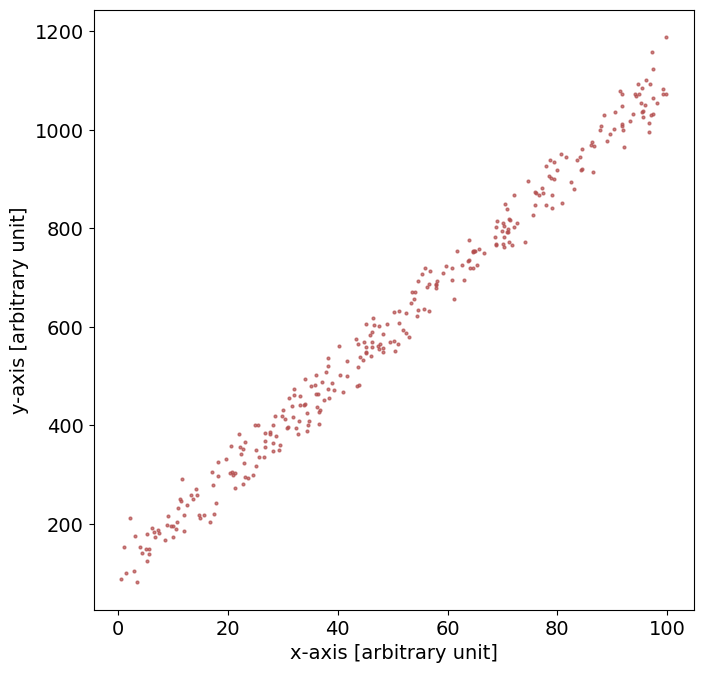

In [12]:
# Initializing Figure ############################################
fig = plt.figure(
                 figsize = (8, 8)
                )
ax = fig.add_axes([0.12, 0.1, 0.75, 0.75])

# Set the x/y axis title and legend
plt.xlabel('x-axis [arbitrary unit]', size = 14.0)
plt.ylabel('y-axis [arbitrary unit]', size = 14.0)

plt.xscale('linear')
plt.yscale('linear')
#plt.xscale('linear')
#plt.yscale('linear')
plt.rc('font', size=14.0)          # controls default text sizes
plt.rc('xtick', labelsize=14.0)    # fontsize of the tick labels
plt.rc('ytick', labelsize=14.0)    # fontsize of the tick labels
##################################################################

plt.plot(x, y,
         'o', markersize = 2.0,
         color = (0.7, 0.3, 0.3, 0.7),
         label = "Randomly realized linear model"
        )




## 3. Data modeling

### Defining functions

In [13]:
def chisquare(y, y_err, ymodel):
    '''
    Return the chi-square given the measurements of y, y-error, and a model of the measurements y.
    
    Input:
        y [np array]      : measurements
        y_err [np array]  : measurement errors
        ymodel [np array] : a model of y 
    
    Return:
        chisquare [double] : the chi-square value
    
    '''
    
    return np.sum( ( (y - ymodel) / y_err)**2 )

### 3.1 Home made code to fit the 1D polynomial model

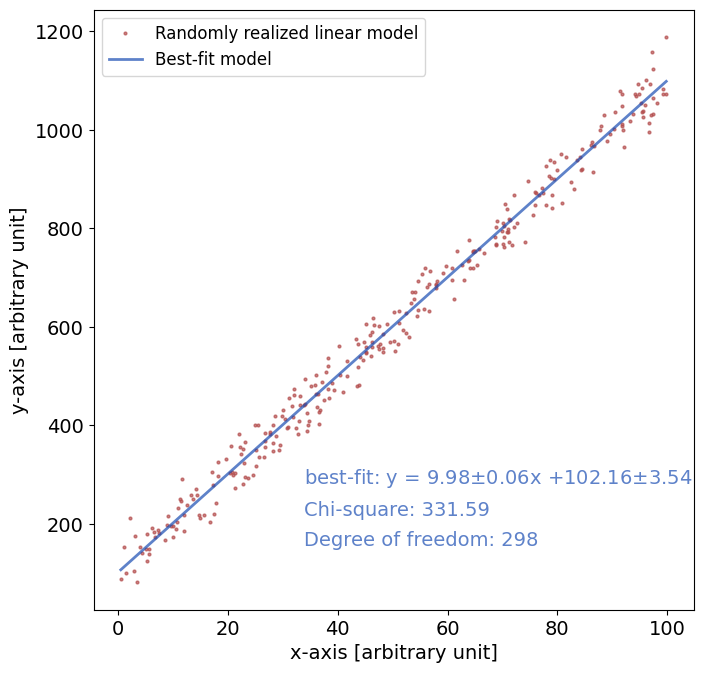

In [14]:
# read data from csv file
path = './'
filename = 'data_1dpoly.csv'
df_read = pd.read_csv(path + filename)

# Equations in Section 15.2 (Fitting Data to a straight line) of W. H. Press, Numerical Receipes, 3rd ed.
# Note that the definition of a and b is interchanged.
S = np.sum(
           1.0 / (df_read.y_err**2)
          )
Sx = np.sum(
            df_read.x / (df_read.y_err**2)
           )
Sy = np.sum(
            df_read.y / (df_read.y_err**2)
           )
Sxx = np.sum(
             (df_read.x**2) / (df_read.y_err**2)
            )
Sxy = np.sum(
             (df_read.x*df_read.y) / (df_read.y_err**2)
            )
Delta = S * Sxx - Sx**2

popt = np.zeros(2)
perr = np.zeros(2)

popt[1]     = (Sxx*Sy - Sx*Sxy) / Delta
popt[0]     = (S*Sxy - Sx*Sy)   / Delta

perr[1]     = np.sqrt( Sxx / Delta )
perr[0]     = np.sqrt( S / Delta )

# plotting data and model

# Initializing Figure ############################################
fig = plt.figure(
                 figsize = (8, 8)
                )
ax = fig.add_axes([0.12, 0.1, 0.75, 0.75])

# Set the x/y axis title and legend
plt.xlabel('x-axis [arbitrary unit]', size = 14.0)
plt.ylabel('y-axis [arbitrary unit]', size = 14.0)

plt.xscale('linear')
plt.yscale('linear')
#plt.xscale('log')
#plt.yscale('log')
plt.rc('font', size=14.0)          # controls default text sizes
plt.rc('xtick', labelsize=14.0)    # fontsize of the tick labels
plt.rc('ytick', labelsize=14.0)    # fontsize of the tick labels
##################################################################

# plot data
plt.plot(df_read.x, df_read.y,
         'o', markersize = 2.0,
         color = (0.7, 0.3, 0.3, 0.7),
         label = "Randomly realized linear model"
        )

# plot model
x_sort = np.sort(df_read.x)
ymodel = myline(x_sort, popt[0], popt[1])
plt.plot(x_sort, ymodel,
         '-', linewidth = 2.0,
         color = (0.1, 0.3, 0.7, 0.7),
         label = "Best-fit model"
        )
chi2 = chisquare(df_read.y, df_read.y_err, myline(df_read.x, popt[0], popt[1]) )


# text labeling
label_string = 'best-fit: y = ' + str( round(popt[0], 2) ) + r'$\pm$' + str( round(perr[0], 2) ) + 'x' + \
                              ' +' + str( round(popt[1], 2) ) + r'$\pm$' + str( round(perr[1], 2) )
plt.text(0.35, 0.2, # location of the text label
         label_string, # content of the label
         color = (0.1, 0.3, 0.7, 0.7),
         verticalalignment = 'bottom', horizontalalignment = 'left',
         transform = ax.transAxes, # use relative coordinates
         fontsize=14)

label_string = 'Chi-square: ' + str( round(chi2, 2) )
plt.text(0.35, 0.15, 
         label_string,
         color = (0.1, 0.3, 0.7, 0.7),
         verticalalignment = 'bottom', horizontalalignment = 'left',
         transform = ax.transAxes,
         fontsize=14)

label_string = 'Degree of freedom: ' + str( num_x - len(popt) )
plt.text(0.35, 0.1, 
         label_string,
         color = (0.1, 0.3, 0.7, 0.7),
         verticalalignment = 'bottom', horizontalalignment = 'left',
         transform = ax.transAxes,
         fontsize=14)

# Setting the figure legend 
plt.legend(loc=2, fontsize=12)

# PDF file output
plt.savefig('HM_modeldata_1dpoly.pdf', 
            transparent = True
           )

### 3.2 Scipy fitting of the 1D polynomial model

Best-fit a:  9.976707771067455   Best-fit b:  102.16339725041354
a error:  0.06508113639171215   b error : 3.737904395876531


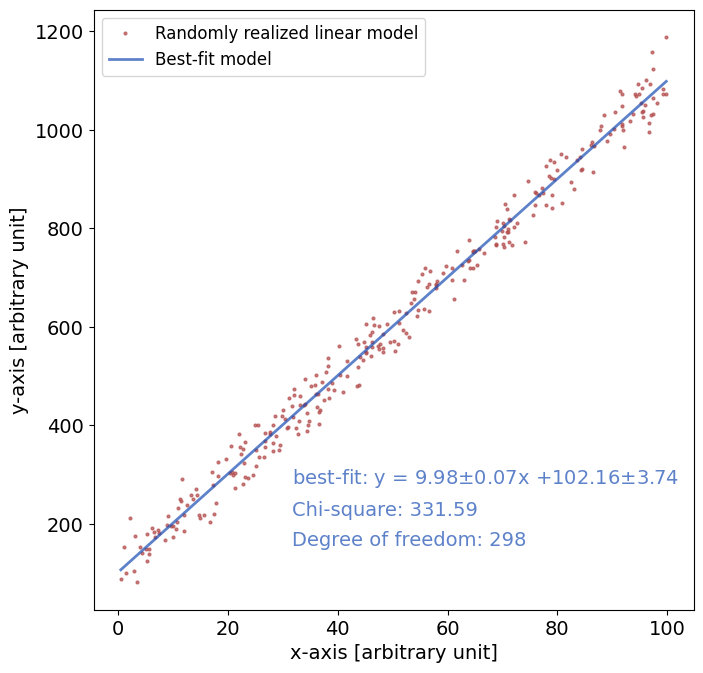

In [15]:
# read data from csv file
path = './'
filename = 'data_1dpoly.csv'
df_read = pd.read_csv(path + filename)

popt, pcov = curve_fit(myline, # function that is the model
                       df_read.x, df_read.y, # x and y values of the data
                       sigma = df_read.y_err # standard measurement error
                      )

# evaluating the uncertainties of fit parameters from the covariant matrix
perr = np.sqrt(np.diag(pcov))

print('Best-fit a: ', popt[0], '  Best-fit b: ', popt[1])
print('a error: ', perr[0], '  b error :', perr[1])

# plotting data and model

# Initializing Figure ############################################
fig = plt.figure(
                 figsize = (8, 8)
                )
ax = fig.add_axes([0.12, 0.1, 0.75, 0.75])

# Set the x/y axis title and legend
plt.xlabel('x-axis [arbitrary unit]', size = 14.0)
plt.ylabel('y-axis [arbitrary unit]', size = 14.0)

plt.xscale('linear')
plt.yscale('linear')
#plt.xscale('log')
#plt.yscale('log')
plt.rc('font', size=14.0)          # controls default text sizes
plt.rc('xtick', labelsize=14.0)    # fontsize of the tick labels
plt.rc('ytick', labelsize=14.0)    # fontsize of the tick labels
##################################################################


# plot data
plt.plot(df_read.x, df_read.y,
         'o', markersize = 2.0,
         color = (0.7, 0.3, 0.3, 0.7),
         label = "Randomly realized linear model"
        )

# plot model
x_sort = np.sort(df_read.x)
ymodel = myline(x_sort, popt[0], popt[1])
plt.plot(x_sort, ymodel,
         '-', linewidth = 2.0,
         color = (0.1, 0.3, 0.7, 0.7),
         label = "Best-fit model"
        )
chi2 = chisquare(df_read.y, df_read.y_err, myline(df_read.x, popt[0], popt[1]) )


# text labeling
label_string = 'best-fit: y = ' + str( round(popt[0], 2) ) + r'$\pm$' + str( round(perr[0], 2) ) + 'x' + \
                              ' +' + str( round(popt[1], 2) ) + r'$\pm$' + str( round(perr[1], 2) )
plt.text(0.33, 0.2, # location of the text label
         label_string, # content of the label
         color = (0.1, 0.3, 0.7, 0.7),
         verticalalignment = 'bottom', horizontalalignment = 'left',
         transform = ax.transAxes, # use relative coordinates
         fontsize=14)

label_string = 'Chi-square: ' + str( round(chi2, 2) )
plt.text(0.33, 0.15, 
         label_string,
         color = (0.1, 0.3, 0.7, 0.7),
         verticalalignment = 'bottom', horizontalalignment = 'left',
         transform = ax.transAxes,
         fontsize=14)

label_string = 'Degree of freedom: ' + str( num_x - len(popt) )
plt.text(0.33, 0.1, 
         label_string,
         color = (0.1, 0.3, 0.7, 0.7),
         verticalalignment = 'bottom', horizontalalignment = 'left',
         transform = ax.transAxes,
         fontsize=14)

# Setting the figure legend 
plt.legend(loc=2, fontsize=12)

# PDF file output
plt.savefig('scipy_modeldata_1dpoly.pdf', 
            transparent = True
           )

#### 3.2.1 Using bootstraping to estimate the uncertainties of fit parameters and confidence level

In [16]:
# defining a function to include Gaussian random errors in the synthetic model
# (if the error is not Gaussian, you can change the form accordingly)

def adderror(y, e_err):
    '''
    A function to include errors in the synthetic measurements.
    '''
    
    return y + np.random.normal(loc = np.zeros(len(y)), scale = y_err)

In [17]:
# number of bootstraping iterations
num_iter = 1000

# create an array to store the fitting results of synthetic data
chisq_boot = np.zeros(num_iter)
a_boot     = np.zeros(num_iter)
b_boot     = np.zeros(num_iter)

# Obtaining the best-fit parameters
path = './'
filename = 'data_1dpoly.csv'
df_read = pd.read_csv(path + filename)

popt, pcov = curve_fit(myline, # function that is the model
                       df_read.x, df_read.y, # x and y values of the data
                      )
chi2       = chisquare(df_read.x, df_read.y, myline(df_read.x, popt[0], popt[1]) )


# construct the best-fit model
x_sort = np.sort(df_read.x)
ymodel = myline(x_sort, popt[0], popt[1])

# bootstraping
for i in range(0, num_iter):
    
    # fit the synthetic data
    y_synthetic = adderror(ymodel, df_read.y_err)
    popt_temp, pcov_temp = curve_fit(myline, x_sort, y_synthetic, sigma = df_read.y_err)
    
    # evaluate chi-square
    chi2_temp = chisquare(x_sort, y_synthetic, myline(x_sort, popt_temp[0], popt_temp[1]) )
    
    # store the results
    chisq_boot[i] = chi2_temp
    a_boot[i]     = popt_temp[0]
    b_boot[i]     = popt_temp[1]
    
# evaluate the mean and standard deviations of chi-square and fit parameters
a_mean   = np.mean( a_boot )
a_stddev = np.std( a_boot )
b_mean   = np.mean( b_boot )
b_stddev = np.std( b_boot )

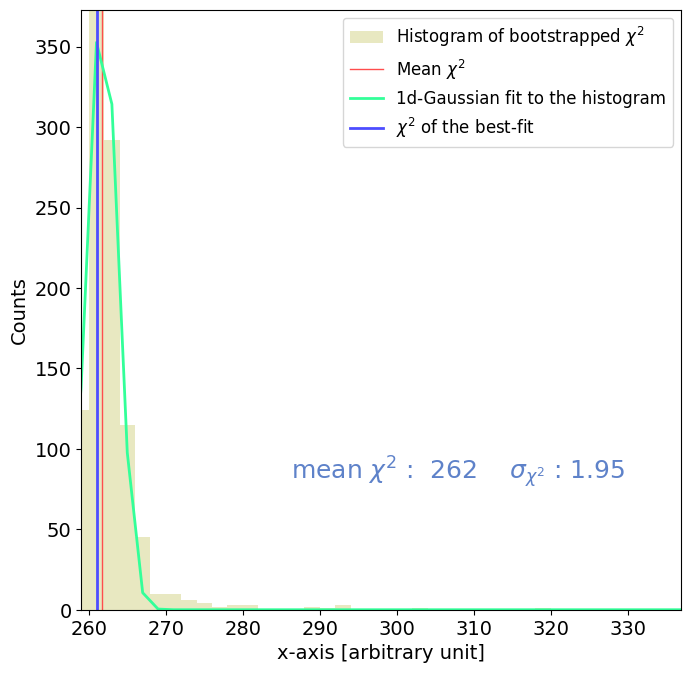

In [18]:
# plotting histograms of the bootstraping results
# chi-square

# Initializing Figure ############################################
fig = plt.figure(
                 figsize = (8, 8)
                )
ax = fig.add_axes([0.12, 0.1, 0.75, 0.75])

# Set the x/y axis title and legend
plt.xlabel('x-axis [arbitrary unit]', size = 14.0)
plt.ylabel('Counts', size = 14.0)

plt.xscale('linear')
plt.yscale('linear')
#plt.xscale('linear')
#plt.yscale('linear')
plt.rc('font', size=14.0)          # controls default text sizes
plt.rc('xtick', labelsize=14.0)    # fontsize of the tick labels
plt.rc('ytick', labelsize=14.0)    # fontsize of the tick labels
##################################################################

deg_o_f = len(df_read.x) - 2
n_bin   = 100
halfhistwidth = 100
binwidth      = halfhistwidth * 2 / n_bin
bins = np.arange(deg_o_f-halfhistwidth, deg_o_f+halfhistwidth, binwidth)
bin_centers = np.zeros(n_bin - 1)
for i in range(0, n_bin - 1):
    bin_centers[i] = (bins[i] + bins[i+1])/2.0

histogram = plt.hist(chisq_boot, 
         bins=bins, color=(0.7,0.7,0.2, 0.3),
         label = r"Histogram of bootstrapped $\chi^{2}$"
        )

# evaluate the mean and standard deviations of chi-square and fit parameters
# using gaussian fittings
bin_centers = np.array(bin_centers)
hist_popt, hist_pcov = curve_fit(gaussian_1d, bin_centers, histogram[0], p0=[1000.0, deg_o_f, 2])
chisq_mean = hist_popt[1]

# plot the mean of bootstrapped chi-square
x_plot = [chisq_mean, chisq_mean]
y_plot = [0, 1e5]
plt.plot(x_plot, y_plot,
         '-', linewidth = 1.0,
         color = (1, 0.3, 0.3, 1),
         label = r'Mean $\chi^{2}$'
        )

# plot the 1d-gaussian fittings to the bootstrap results
plt.plot(bin_centers, gaussian_1d(bin_centers, hist_popt[0],hist_popt[1],hist_popt[2]),
         '-', linewidth = 2.0,
         color = (0.2, 1.0, 0.6, 1),
         label = r'1d-Gaussian fit to the histogram'
        )

# text labeling
label_string = r'mean $\chi^{2}$ :  ' + str(round(hist_popt[1])) + '    '
label_string += r'$\sigma_{\chi^{2}}$ : ' + str(round(hist_popt[2] ,2))
plt.text(0.35, 0.2, # location of the text label
         label_string, # content of the label
         color = (0.1, 0.3, 0.7, 0.7),
         verticalalignment = 'bottom', horizontalalignment = 'left',
         transform = ax.transAxes, # use relative coordinates
         fontsize=18)

# plot the chi-square of the best fit
x_plot = [chi2, chi2]
y_plot = [0, 1e5]
plt.plot(x_plot, y_plot,
         '-', linewidth = 2.0,
         color = (0.3, 0.3, 1, 1),
         label = r'$\chi^{2}$ of the best-fit'
        )

# set the plot range of y-axis
xlim = (deg_o_f - hist_popt[2]*5, deg_o_f + hist_popt[2]*5)
plt.xlim( (deg_o_f - hist_popt[2]*20, deg_o_f + hist_popt[2]*20) ) 
plt.ylim( (0, np.max(histogram[0]) ) )

# Setting the figure legend 
plt.legend(loc=1, fontsize=12)

# PDF file output
plt.savefig('scipy_modeldata_1dpoly_histogram_chisq.pdf', 
            transparent = True
           )

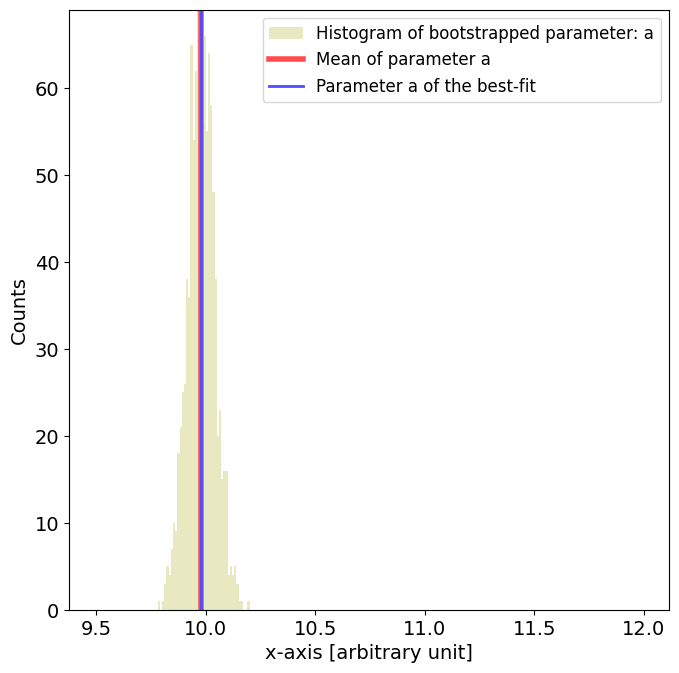

In [19]:
# plotting histograms of the bootstraping results
# chi-square

# Initializing Figure ############################################
fig = plt.figure(
                 figsize = (8, 8)
                )
ax = fig.add_axes([0.12, 0.1, 0.75, 0.75])

# Set the x/y axis title and legend
plt.xlabel('x-axis [arbitrary unit]', size = 14.0)
plt.ylabel('Counts', size = 14.0)

plt.xscale('linear')
plt.yscale('linear')
#plt.xscale('linear')
#plt.yscale('linear')
plt.rc('font', size=14.0)          # controls default text sizes
plt.rc('xtick', labelsize=14.0)    # fontsize of the tick labels
plt.rc('ytick', labelsize=14.0)    # fontsize of the tick labels
##################################################################

bins = np.arange(9.5, 12, 0.01)

histogram = plt.hist(a_boot, 
         bins=bins, 
         color=(0.7,0.7,0.2, 0.3),
         label = r"Histogram of bootstrapped parameter: a"
        )

# plot the mean of bootstrapped chi-square
x_plot = [a_mean, a_mean]
y_plot = [0, 1e5]
plt.plot(x_plot, y_plot,
         '-', linewidth = 4.0,
         color = (1, 0.3, 0.3, 1),
         label = r'Mean of parameter a'
        )

# plot the chi-square of the best fit
x_plot = [popt[0], popt[0]]
y_plot = [0, 1e5]
plt.plot(x_plot, y_plot,
         '-', linewidth = 2.0,
         color = (0.3, 0.3, 1, 1),
         label = r'Parameter a of the best-fit'
        )


# set the plot range of y-axis
plt.ylim( (0, np.max(histogram[0]) ) )

# Setting the figure legend 
plt.legend(loc=1, fontsize=12)

# PDF file output
plt.savefig('scipy_modeldata_1dpoly_histogram_a.pdf', 
            transparent = True
           )

### 3.3 MCMC fitting of the 1D polynomial model
y = ax + b

In [20]:
# importing the package for MCMC fittings
import emcee, corner

In [21]:
# allow using multiple processors
from multiprocessing import Pool
from multiprocessing import cpu_count

num_cpu = cpu_count()
print("You have {0} Processors".format(num_cpu))

You have 8 Processors


#### 3.3.1 Definining functions that are required in the MCMC model fittings

In [22]:
def log_prior(parms):
    '''
    Here is basically flat priors over the range [-1e10, 1e10] for both parameters.
    
    Input:
        parms [numpy array] : the input variables for the model function.
        
    Return:
        prob [double] : logged "prior" probability
    '''
    a, b = parms
    if (-1e10 < a < 1e10) and \
       (-1e10 < b < 1e10):
        return 0.0
    
    return -np.inf


def log_likelihood(parms, x, y, y_err):
    '''
    This is the likelihood function.
    
    Input:
        parms [numpy array] : the input variables for the model function.
        x [numpy array] : x-coordinate values
        y [numpy array] : y-coordinate values
        yerr [numpy array] : standard measurement errors of y
    '''
    a, b  = parms
    ymodel = myline(x, a, b)
    
    ln_likelihood = -0.5 * chisquare(y, y_err, ymodel)
    
    return ln_likelihood


def log_probability(parms, x, y, yerr):
    '''
    This is the log probability function.
    
    Input:
        parms [numpy array] : the input variables for the model function.
        x [numpy array] : x-coordinate values
        y [numpy array] : y-coordinate values
        yerr [numpy array] : standard measurement errors of y
    '''
    
    lp = log_prior(parms)
    if not np.isfinite(lp):
        return -np.inf
    
    return lp + log_likelihood(parms, x, y, yerr)

#### 3.3.2 Doing the MCMC fittings
check [this page](https://emcee.readthedocs.io/en/stable/tutorials/parallel/) for how to parallelize this part.

In [23]:
# read data from csv file
path = './'
filename = 'data_1dpoly.csv'
df_read = pd.read_csv(path + filename)

# model setup
init_parms   = np.array( [999.0, 999.0] )
ndim         = len(init_parms)

# MCMC setup
nwalkers        = 16    # number of walkers, which need to be a few times larger than the number of free-parameters
nsteps          = 1000 # number of steps
step_to_discard = 100  # number of steps to be discarded

# initialize walkers at different positions (i.e., initial parameters)
pos = init_parms + np.random.randn(nwalkers, ndim ) * 300

# initializing the emcee samplers
sampler = emcee.EnsembleSampler(
                                nwalkers, ndim, log_probability, 
                                args=(df_read.x, df_read.y, df_read.y_err)
                                )


# advancing the emcee samplers
sampler.run_mcmc(
                 pos, nsteps, progress = True
                )

100%|█████████████████████████████████████████████████| 1000/1000 [00:06<00:00, 150.70it/s]


State([[  9.99552552 100.79844632]
 [  9.84912892 106.96608765]
 [ 10.03196491  95.05403642]
 [  9.95757233 102.43202265]
 [ 10.01396215  99.9815733 ]
 [  9.85179674 108.12447199]
 [  9.97980624  99.58457806]
 [ 10.09301808  93.72881737]
 [  9.98536271 103.66905118]
 [  9.9816285  102.39020606]
 [  9.99007789 100.67797753]
 [  9.94514917 105.84614313]
 [  9.94012365 103.20947534]
 [  9.93311026 103.47690005]
 [  9.96978509 104.36033702]
 [ 10.06663986  96.34429171]], log_prob=[-165.87244942 -168.355452   -169.33753658 -165.92373185 -165.995106
 -167.86052376 -166.77645263 -168.70576386 -166.43290896 -165.83677104
 -165.93056547 -166.66310151 -166.07527836 -166.17235371 -166.37300138
 -167.1459406 ], blobs=None, random_state=('MT19937', array([2618918472, 4056369708,   18157519, 3540755910, 1128454265,
        951334320, 1155939946, 2430008439, 3564126662,  432871368,
       2905850421, 4246731686, 2356618238,  264901335, 3168901568,
       2830607658, 2690040100, 1040729499,  177615093

#### 3.3.3 Plotting saplers

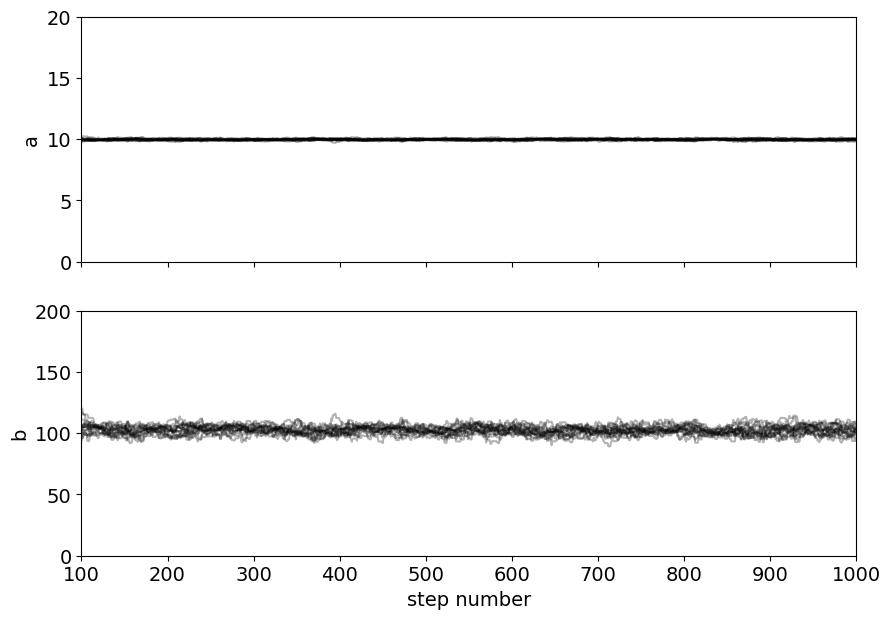

In [24]:
fig, axes = plt.subplots(2, figsize=(10, 7), sharex=True)

samples = sampler.get_chain()
num_samples = len(samples)

labels = ["a", "b"]

for i in range(ndim):
    ax = axes[i]
    ax.plot(
            samples[:, :, i], 
            "k", 
            alpha=0.3
           )
    ax.set_xlim(0, len(samples))
    ax.set_ylabel(labels[i])

axes[-1].set_xlabel("step number");

# Setting plotting ranges
ax.set_xlim(step_to_discard, num_samples)
axes[0].set_ylim(0, 20)
axes[1].set_ylim(0, 200)

# PDF file output
plt.savefig('emcee_modeldata_1dpoly.pdf', 
            transparent = True
           )

#### 3.3.4 Making corner plot

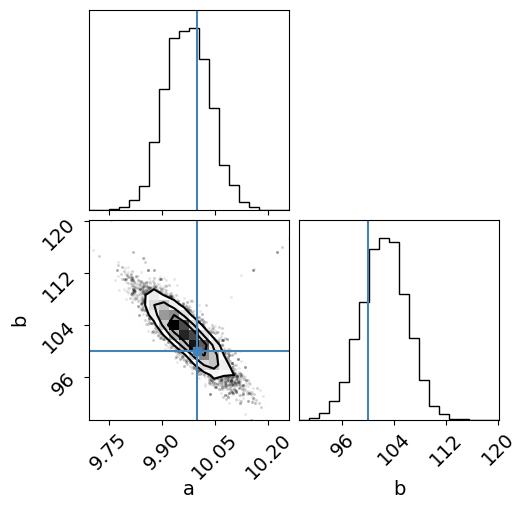

In [25]:
import corner

flat_samples = sampler.get_chain(
                                 discard = step_to_discard, 
                                 #thin = 15, 
                                 flat = True
                                )

fig = corner.corner(
                    flat_samples, labels = labels, truths=[a, b]
                   )

# PDF file output
plt.savefig('emcee_corner_1dpoly.pdf', 
            transparent = True
           )

#### 3.3.5 Summarizing the results of MCMC fittings

In [26]:
mcmc_a = np.percentile(flat_samples[:, 0], [16, 50, 84])
q      = np.diff(mcmc_a)
print('a value is: ' + str(round(mcmc_a[1],2) ) + '-' + str(round(q[0],2) ) +  '/+' + str( round(q[1], 2) ))

mcmc_b = np.percentile(flat_samples[:, 1], [16, 50, 84])
q      = np.diff(mcmc_b)
print('b value is: ' + str(round(mcmc_b[1],2) ) + '-' + str(round(q[0],2) ) +  '/+' + str( round(q[1], 2) ))

a value is: 9.97-0.06/+0.06
b value is: 102.51-3.58/+3.4


#### 3.3.6 Plotting the MCMC fitting results

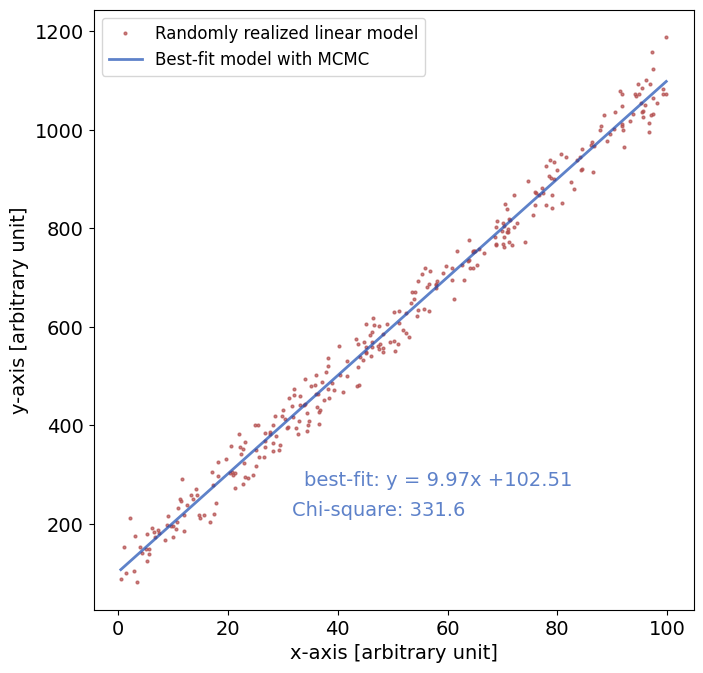

In [27]:
# Initializing Figure ############################################
fig = plt.figure(
                 figsize = (8, 8)
                )
ax = fig.add_axes([0.12, 0.1, 0.75, 0.75])

# Set the x/y axis title and legend
plt.xlabel('x-axis [arbitrary unit]', size = 14.0)
plt.ylabel('y-axis [arbitrary unit]', size = 14.0)

plt.xscale('linear')
plt.yscale('linear')
#plt.xscale('linear')
#plt.yscale('linear')
plt.rc('font', size=14.0)          # controls default text sizes
plt.rc('xtick', labelsize=14.0)    # fontsize of the tick labels
plt.rc('ytick', labelsize=14.0)    # fontsize of the tick labels
##################################################################

# label chi-square
chi2 = chisquare(df_read.y, df_read.y_err, myline(df_read.x, mcmc_a[1], mcmc_b[1] ) )
label_string = 'Chi-square: ' + str( round(chi2, 2) )
plt.text(0.33, 0.15, 
         label_string,
         color = (0.1, 0.3, 0.7, 0.7),
         verticalalignment = 'bottom', horizontalalignment = 'left',
         transform = ax.transAxes,
         fontsize=14)

# plot data
plt.plot(df_read.x, df_read.y,
         'o', markersize = 2.0,
         color = (0.7, 0.3, 0.3, 0.7),
         label = "Randomly realized linear model"
        )

# plot model
x_sort = np.sort(df_read.x)
plt.plot(x_sort, myline(x_sort, mcmc_a[1], mcmc_b[1]),
         '-', linewidth = 2.0,
         color = (0.1, 0.3, 0.7, 0.7),
         label = "Best-fit model with MCMC"
        )

# text labeling
label_string = 'best-fit: y = ' + str( round(mcmc_a[1], 2) ) + 'x' + \
                              ' +' + str( round(mcmc_b[1], 2) )
plt.text(0.35, 0.2, # location of the text label
         label_string, # content of the label
         color = (0.1, 0.3, 0.7, 0.7),
         verticalalignment = 'bottom', horizontalalignment = 'left',
         transform = ax.transAxes, # use relative coordinates
         fontsize=14)

# Setting the figure legend 
plt.legend(loc=2, fontsize=12)

# PDF file output
plt.savefig('MCMC_modeldata_1dpoly.pdf', 
            transparent = True
           )